In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
import numpy as np
import pandas as pd
import csv
import DataAnalysis as da
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Experiment 1

In [12]:
def weighted_average_with_error(weight1, temp1, weight2, temp2, temp_err=.2, mass_err=1):
    total_weight = weight1 + weight2
    per1 = weight1/total_weight
    per2 = weight2/total_weight
    per1_err = weight2/total_weight**2
    per2_err = weight1/total_weight**2
    
    weighted_average = temp1*per1 + temp2*per2
    partial_t1 = per1
    partial_t2 = per2
    partial_p1 = temp1
    partial_p2 = temp2
    return weighted_average, da.quartrature_sum([partial_t1*temp_err, partial_t2*temp_err, partial_p1*per1_err, partial_p2*per2_err])


In [13]:
weighted_average_with_error(190, 21.1, 290, 46.9)

(36.6875, 0.15188561825136584)

In [14]:
weighted_average_with_error(123, 15.5, 234, 47.6)

(36.54033613445378, 0.15765055196968697)

In [15]:
weighted_average_with_error(276, 15, 159, 47.1)

(26.733103448275862, 0.16225069035661693)

In [16]:
weighted_average_with_error(243, 15.2, 222, 47.5)

(30.62064516129032, 0.15209853257031655)

In [17]:
weighted_average_with_error(246, 15.5, 184, 47.2)

(29.064651162790696, 0.15683493220464675)

In [19]:
da.quartrature_sum([.2,.15])

0.25

In [20]:
da.quartrature_sum([.2,.16])

0.25612496949731395

# Experiment 2

In [17]:
latenent_heat(47.6, .3, 17.8, 340, 105)

77.98693932584261

In [25]:
latenent_heat(47.2, .3, 5.3, 217, 117)

106.57048862275435

In [19]:
latenent_heat(47, .3, 17.2, 237, 81)

74.91333584905674

In [15]:
latenent_heat(47.2, .2, 14.5, 223, 86)

82.0862886731392

# Experiment 3

In [8]:
diameter=6.3-.2533*2

In [16]:
area = (diameter/2)**2*np.pi

In [20]:
height = 106/area

In [23]:
sa = height*np.pi*diameter + area

In [24]:
sa

99.54742807217508

In [25]:
def sa_func(mass=106):
    diameter=6.3-.2533*2
    area = (diameter/2)**2*np.pi
    height = mass/area
    sa = height*np.pi*diameter + area
    return sa

In [30]:
sa = sa_func(101)

In [29]:
def k_func(m, sa, tc1, tc2, th, c=4.184, thickness=.002533):
    const = m*c*thickness/sa
    differencial=(tc2-tc1)/(th-tc1)
    return const*differencial

In [30]:
def k_val(data, m, th):
    sa = sa_func(m)*(1e-2)**2
    k = [k_func(m, sa, data[i], data[i+1], th) for i in range(len(data)-1)]
    return k

In [31]:
with open('filename.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'filename.csv'

In [32]:
lab = pd.read_csv("Lab 6 Exp 3.csv")

In [33]:
data = np.array(lab["Temp"])


In [53]:
lab["Time"][:-1]

0       0.000000
1       0.033333
2       0.066667
3       0.100000
4       0.133333
         ...    
296     9.866667
297     9.900000
298     9.933333
299     9.966667
300    10.000000
Name: Time, Length: 301, dtype: float64

In [88]:
def log(x, a, b, c):
    x = np.array(x)
    return np.exp(-(a*x + b)) + c

In [82]:
pov

array([ 4.25324287,  1.62567987, 11.05649516,  1.41928407])

In [89]:
time = lab["Time"][20:-20]
temp = lab["Temp"][20:-20]
pov, cov = opt.curve_fit(log, time, temp, [1,1,1])
a, b, c = pov
y = log(time, a, b, c)

/home/ayushmaan/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


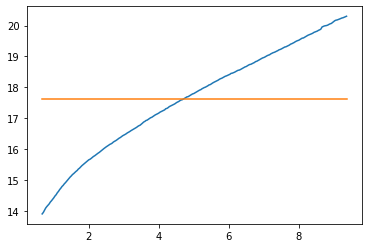

In [90]:
plt.plot(time, np.array(temp))
plt.plot(time, y)

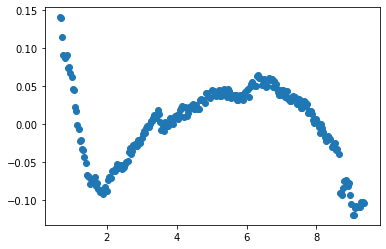

In [85]:
plt.scatter(time, y - temp)

In [86]:
k = k_val(data, 223, 48.1)

NameError: name 'sa_func' is not defined

In [72]:
pd.DataFrame(k).describe()

,0
count,300.000000
mean,0.106221
std,0.054550
min,-0.065140
25%,0.076803
50%,0.097106
75%,0.121925
max,0.473126


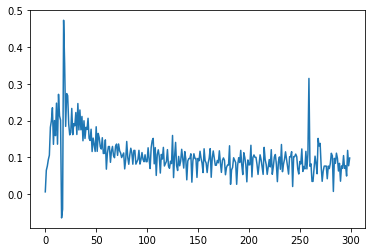

In [73]:
plt.plot(k)

In [73]:
# Import the csv file
lab = pd.read_csv("Lab 6 Exp 4 Aluminum Rod.csv")

In [73]:
# Save the data into time and temp variables
# Cut out the inital data(first 100 points) 
# where the thermoprobe is just getting warmed up
time = lab["Latest: Time (min)"][100:-1]
temp = lab["Latest: Temperature (°C)"][100:-1]

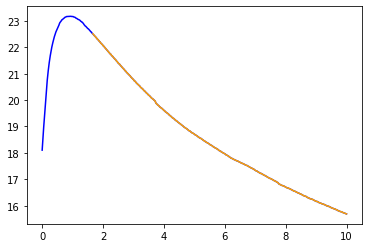

In [73]:
# Plot the data where the orange line is the data
# being used in the fit after cutting out the data
plt.plot(lab["Latest: Time (min)"], lab["Latest: Temperature (°C)"], color='blue')
plt.plot(time, temp, color ='orange')

In [74]:
# Model with a few additional variables to help
# fit the data
def model_al(x, v, T0=24, t0=0, c=0):
    x = np.array(x) + t0
    return (4*T0/np.pi)* np.exp(-v*x/2) + c

In [78]:
# fit the data using some initial parameters
pov, cov = opt.curve_fit(model_al, time, temp, [.25, 24, 0, 0], maxfev = 100000)
v, T, t, c = pov
y = model_al(time, v, T, t, c)
print(f"Gamma: {v}")
print(f"Initial Temp: {T}")
print(f"Time Offset: {t}")
print(f"Temp Offset: {c}")

Gamma: 0.31372750885034023
Initial Temp: 6.429981404786842
Time Offset: -2.4461157026847955
Temp Offset: 13.260315484422021


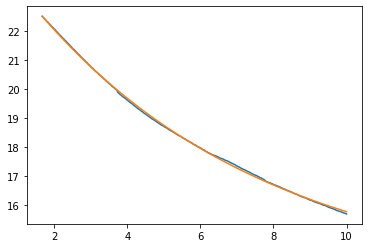

In [76]:
# Plot the fitted curve
plt.plot(time, np.array(temp))
plt.plot(time, y)
plt.show()

In [6]:
def latenent_heat(th, tc, tf, mh, mc):
    Qh = mh*4.184*(th+273.15)
    Qc = mc*4.184*(tc+273.15)
    Qf = (mh+mc)*4.184*(tf+273.15)
    diff = Qh+Qc-Qf
    return diff/(mh+mc)
    